<a href="https://colab.research.google.com/github/itsstephxc/Dashboards/blob/main/Feature_Importance_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Feature Importance

import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learming Model
from sklearn.linear_model import LogisticRegression 

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/itsstephxc/Special-Topic-DA/main/baseball.csv")
df.sample(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
577,OAK,AL,1991,760,776,84,0.331,0.389,0.248,0,NaN,NaN,162,NaN,NaN
114,SFG,NL,2009,657,611,88,0.309,0.389,0.257,0,NaN,NaN,162,0.314,0.372
731,NYM,NL,1985,695,568,98,0.323,0.385,0.257,0,NaN,NaN,162,NaN,NaN
400,DET,AL,1999,747,882,69,0.326,0.443,0.261,0,NaN,NaN,161,0.349,0.451
452,BAL,AL,1997,812,681,98,0.341,0.429,0.268,1,2.0,3.0,162,NaN,NaN


In [36]:
print(df.shape)

(1232, 15)


In [37]:
df.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [38]:
df = df.fillna(0)  
print(df.isnull().sum())
print(df.dtypes)

Team            0
League          0
Year            0
RS              0
RA              0
W               0
OBP             0
SLG             0
BA              0
Playoffs        0
RankSeason      0
RankPlayoffs    0
G               0
OOBP            0
OSLG            0
dtype: int64
Team             object
League           object
Year              int64
RS                int64
RA                int64
W                 int64
OBP             float64
SLG             float64
BA              float64
Playoffs          int64
RankSeason      float64
RankPlayoffs    float64
G                 int64
OOBP            float64
OSLG            float64
dtype: object


In [39]:
df.nunique()

Team             39
League            2
Year             47
RS              374
RA              381
W                63
OBP              87
SLG             162
BA               75
Playoffs          2
RankSeason        9
RankPlayoffs      6
G                 8
OOBP             73
OSLG            113
dtype: int64

In [40]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [41]:
df.dtypes

Team             object
League           object
Year              int64
RS                int64
RA                int64
W                 int64
OBP             float64
SLG             float64
BA              float64
Playoffs          int64
RankSeason      float64
RankPlayoffs    float64
G                 int64
OOBP            float64
OSLG            float64
dtype: object

In [42]:
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)

In [43]:
numDF.head()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,2012,734,688,81,0.328,0.418,0.259,0,0.0,0.0,162,0.317,0.415
1,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,2012,734,806,69,0.315,0.415,0.260,0,0.0,0.0,162,0.331,0.428
4,2012,613,759,61,0.302,0.378,0.240,0,0.0,0.0,162,0.335,0.424


In [44]:

numDF = pd.DataFrame(scaler.fit_transform(numDF.values),columns=numDF.columns,index=numDF.index)
numDF.head()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,0.910891,0.186992,-0.168675,0.0000,0.10,0.478261,-0.058824,0.0,0.0,0.0,0.0,0.984472,1.032338
1,0.910891,-0.089431,-0.875502,0.8125,-0.30,-0.152174,-0.764706,1.0,4.0,5.0,0.0,0.950311,0.940299
2,0.910891,0.008130,-0.032129,0.7500,-0.75,0.456522,-0.764706,1.0,5.0,4.0,0.0,0.978261,1.002488
3,0.910891,0.186992,0.779116,-0.7500,-0.55,0.413043,0.000000,0.0,0.0,0.0,0.0,1.027950,1.064677
4,0.910891,-0.796748,0.401606,-1.2500,-1.20,-0.391304,-1.176471,0.0,0.0,0.0,0.0,1.040373,1.054726


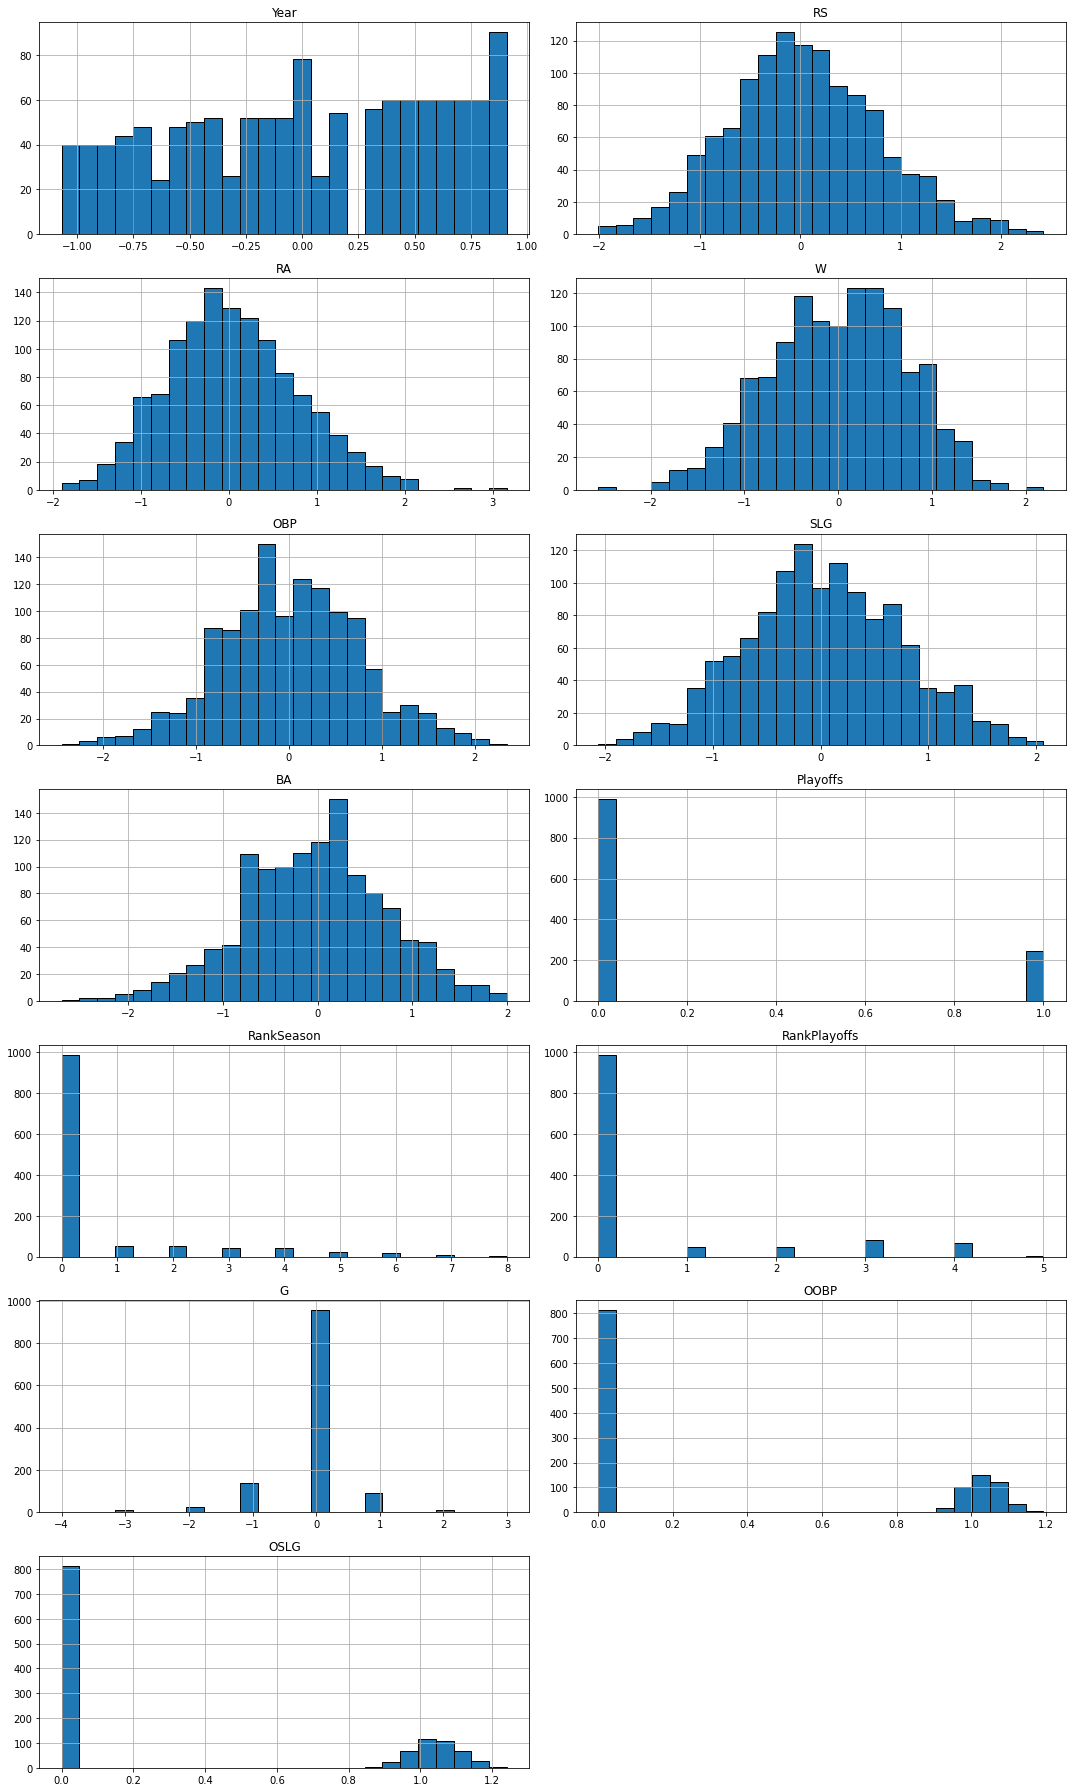

In [45]:
# Feature Distribution
# Courtesy of Eladio
# Plots the histogram for each numerical feature in a separate subplot
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2),
edgecolor="black")
plt.tight_layout();

In [46]:
# Drop the target variable from the DF
catDF.drop(['League'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
catDF.head()


,Team
0,ARI
1,ATL
2,BAL
3,BOS
4,CHC


In [48]:
# Encode your cat data
catDF = pd.get_dummies(catDF)

In [ ]:
catDF.head()

,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,1,0
4,0,1,1,0


In [50]:
# Merge with the original dataframe
# Prepare the X variables
X = pd.concat([catDF, numDF],axis=1)
print(X.shape)
#Prepare the Y variable
Y = df['League']

(1232, 52)


In [51]:
# Tree models have trouble turning strings to float to labelel the target
Y = Y.replace(to_replace=['No','Yes'],value=[0,1])
print(Y.shape)
X.head()

(1232,)


,Team_ANA,Team_ARI,Team_ATL,Team_BAL,Team_BOS,Team_CAL,Team_CHC,Team_CHW,Team_CIN,Team_CLE,...,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,0,1,0,0,0,0,0,0,0,0,...,0.0000,0.10,0.478261,-0.058824,0.0,0.0,0.0,0.0,0.984472,1.032338
1,0,0,1,0,0,0,0,0,0,0,...,0.8125,-0.30,-0.152174,-0.764706,1.0,4.0,5.0,0.0,0.950311,0.940299
2,0,0,0,1,0,0,0,0,0,0,...,0.7500,-0.75,0.456522,-0.764706,1.0,5.0,4.0,0.0,0.978261,1.002488
3,0,0,0,0,1,0,0,0,0,0,...,-0.7500,-0.55,0.413043,0.000000,0.0,0.0,0.0,0.0,1.027950,1.064677
4,0,0,0,0,0,0,1,0,0,0,...,-1.2500,-1.20,-0.391304,-1.176471,0.0,0.0,0.0,0.0,1.040373,1.054726


In [52]:
Y.head()

0    NL
1    NL
2    AL
3    AL
4    NL
Name: League, dtype: object

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)

In [54]:
# First we build and train our Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.feature_importances_
# create a new DataFrame with feature importances and column names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# print the feature importances
print(feature_importances)

         feature  importance
23      Team_NYM    0.069895
28      Team_SDP    0.063079
32      Team_STL    0.060178
8       Team_CIN    0.050712
15      Team_KCR    0.050130
27      Team_PIT    0.050078
31      Team_SFG    0.047946
17      Team_LAD    0.046414
45            BA    0.043805
4       Team_BOS    0.041088
6       Team_CHC    0.040776
11      Team_DET    0.037090
20      Team_MIN    0.036064
3       Team_BAL    0.033587
40            RS    0.033496
7       Team_CHW    0.032686
13      Team_HOU    0.030757
24      Team_NYY    0.030045
26      Team_PHI    0.027700
25      Team_OAK    0.026865
2       Team_ATL    0.022195
9       Team_CLE    0.017263
44           SLG    0.015601
41            RA    0.013173
29      Team_SEA    0.011222
39          Year    0.009562
5       Team_CAL    0.009331
36      Team_TOR    0.008790
10      Team_COL    0.007660
35      Team_TEX    0.006511
42             W    0.005245
43           OBP    0.005218
50          OOBP    0.004358
51          OS

In [55]:
#Permutation Importance --- notice that it does NOT use a MODEL
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean

In [56]:
print(perm.to_string())

              AVG_Importance STD_Importance
Team_ANA            0.000000            NaN
Team_ARI            0.001892            NaN
Team_ATL            0.019189            NaN
Team_BAL            0.024595            NaN
Team_BOS            0.007838            NaN
Team_CAL            0.011081            NaN
Team_CHC            0.028649            NaN
Team_CHW            0.023784            NaN
Team_CIN            0.032162            NaN
Team_CLE            0.024595            NaN
Team_COL           -0.000270            NaN
Team_DET            0.028108            NaN
Team_FLA            0.005405            NaN
Team_HOU            0.015135            NaN
Team_KCA            0.000000            NaN
Team_KCR            0.011892            NaN
Team_LAA           -0.000270            NaN
Team_LAD            0.021081            NaN
Team_MIA            0.000000            NaN
Team_MIL            0.000000            NaN
Team_MIN            0.016757            NaN
Team_MLN            0.000000    

In [57]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X,Y)

KNeighborsClassifier()

In [58]:
results = permutation_importance(kn, X_test, y_test, n_repeats=10, random_state=0)

Feature: 0  Score: -0.0024324324324324076
Feature: 1  Score: -0.0002702702702702675
Feature: 2  Score: 0.0
Feature: 3  Score: 0.0
Feature: 4  Score: 0.0
Feature: 5  Score: 0.0
Feature: 6  Score: 0.0
Feature: 7  Score: 0.0
Feature: 8  Score: 0.0002702702702702675
Feature: 9  Score: 0.0002702702702702675
Feature: 10  Score: 0.00027027027027028974
Feature: 11  Score: 0.000540540540540535
Feature: 12  Score: 0.0005405405405405683
Feature: 13  Score: 0.0018918918918918947
Feature: 14  Score: 0.002702702702702675
Feature: 15  Score: 0.002702702702702675
Feature: 16  Score: 0.002702702702702675
Feature: 17  Score: 0.0027027027027027085
Feature: 18  Score: 0.003513513513513511
Feature: 19  Score: 0.004324324324324336
Feature: 20  Score: 0.005405405405405417
Feature: 21  Score: 0.005405405405405428
Feature: 22  Score: 0.005405405405405439
Feature: 23  Score: 0.005945945945945974
Feature: 24  Score: 0.005945945945945996
Feature: 25  Score: 0.00648648648648652
Feature: 26  Score: 0.00702702702702

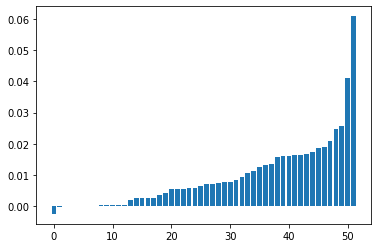

In [59]:
from matplotlib import pyplot

# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()


Feature: 0 - Name: Team_ANA - Score: -0.0024324324324324076
Feature: 1 - Name: Team_ARI - Score: -0.0002702702702702675
Feature: 2 - Name: Team_ATL - Score: 0.0
Feature: 3 - Name: Team_BAL - Score: 0.0
Feature: 4 - Name: Team_BOS - Score: 0.0
Feature: 5 - Name: Team_CAL - Score: 0.0
Feature: 6 - Name: Team_CHC - Score: 0.0
Feature: 7 - Name: Team_CHW - Score: 0.0
Feature: 8 - Name: Team_CIN - Score: 0.0002702702702702675
Feature: 9 - Name: Team_CLE - Score: 0.0002702702702702675
Feature: 10 - Name: Team_COL - Score: 0.00027027027027028974
Feature: 11 - Name: Team_DET - Score: 0.000540540540540535
Feature: 12 - Name: Team_FLA - Score: 0.0005405405405405683
Feature: 13 - Name: Team_HOU - Score: 0.0018918918918918947
Feature: 14 - Name: Team_KCA - Score: 0.002702702702702675
Feature: 15 - Name: Team_KCR - Score: 0.002702702702702675
Feature: 16 - Name: Team_LAA - Score: 0.002702702702702675
Feature: 17 - Name: Team_LAD - Score: 0.0027027027027027085
Feature: 18 - Name: Team_MIA - Score: 0

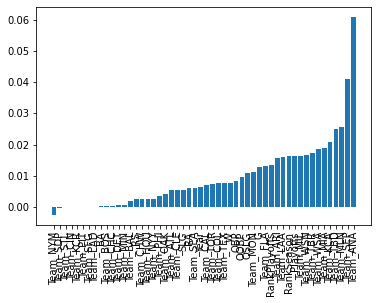

In [60]:
from matplotlib import pyplot
# Courtesy of Eladio... again :)
# get importance
importance = feature_importances['importance']
importance = results.importances_mean
importance = np.sort(importance)

# get feature names
feature_names = feature_importances['feature']

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: {} - Name: {} - Score: {}'.format(i, feature_names[i], v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(range(len(importance)), feature_names, rotation=90)
pyplot.show()

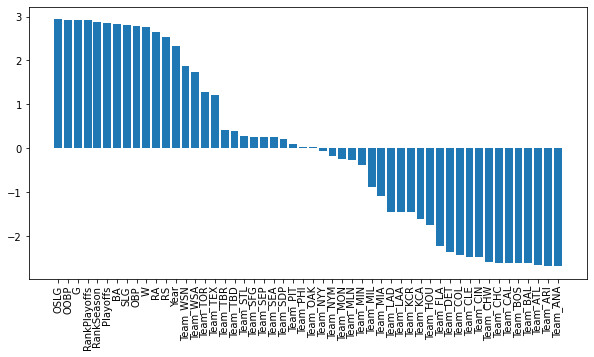

In [61]:
# Coefficients
model = LogisticRegression()
model.fit(X,Y)
importance = model.coef_[0]
importance = np.sort(importance)
importance
importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance = importance.sort_values('importance', ascending=False)

# create a chart of feature importances
plt.figure(figsize=(10,5))
plt.bar(importance['feature'], importance['importance'])
plt.xticks(rotation=90)
plt.show()

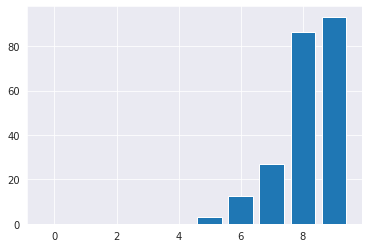

In [63]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
X, Y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
model=LinearRegression()
model.fit(X,Y)
importance=model.coef_
importance=np.sort(importance)
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

Feature: 0, Score: 0.0014693393394432082
Feature: 1, Score: 0.001548727930568828
Feature: 2, Score: 0.0025274862981790273
Feature: 3, Score: 0.00265592598459471
Feature: 4, Score: 0.0027833560489069894
Feature: 5, Score: 0.0036091475060819086
Feature: 6, Score: 0.0041510382525216235
Feature: 7, Score: 0.02673648941833899
Feature: 8, Score: 0.43738163351817355
Feature: 9, Score: 0.517136855703191


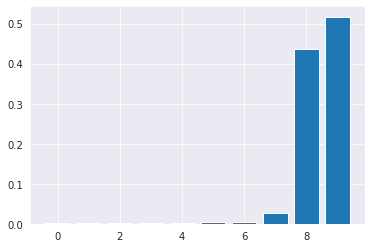

In [64]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,Y)
importance = model.feature_importances_
importance = np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()